In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pickle
from datetime import datetime

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

C:\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('data_filtered_rand.csv')

In [3]:
df

,date,temperature,turbidity,dissolved_oxygen,ph,ammonia,nitrate,population,fish_length,fish_weight,pond,feed_amount,fish_biomass,feed_ratio
0,01-07-2021,24.8125,96.0,15.002,7.58477,0.72440,92.0,NaN,10.754286,11.502857,Pond 9,0.287571,10.000714,2.875509
1,29-06-2021,24.6875,100.0,6.880,7.92976,0.38000,117.0,50.0,10.460000,10.360000,Pond 2,0.259000,9.151060,2.830273
2,24-06-2021,25.0625,100.0,17.044,8.20213,0.38000,143.0,50.0,8.710000,6.860000,Pond 2,0.171500,5.093638,3.366945
3,16-08-2021,24.9375,35.0,16.439,7.04457,0.56293,978.0,NaN,23.788571,143.542857,Pond 7,3.588571,126.867027,2.828608
4,15-08-2021,24.5625,100.0,1.056,7.60292,0.00007,1799.0,75.0,25.630000,163.360000,Pond 4,4.084000,161.051786,2.535830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379583,28-06-2021,24.3125,85.0,20.834,7.68463,0.53592,93.0,NaN,9.875714,9.857143,Pond 9,0.246429,7.613586,3.236695
379584,19-06-2021,26.3125,100.0,11.909,8.40641,0.45842,202.0,50.0,7.110000,2.910000,Pond 1,0.072750,2.660435,2.734515
379585,14-08-2021,23.2500,100.0,5.080,7.31694,0.23018,742.0,50.0,20.310000,49.300000,Pond 3,1.232500,76.496534,1.611184
379586,23-07-2021,23.8750,100.0,11.149,6.73135,0.23756,896.0,75.0,17.520000,49.430000,Pond 6,1.235750,47.673730,2.592098


In [4]:
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y'))

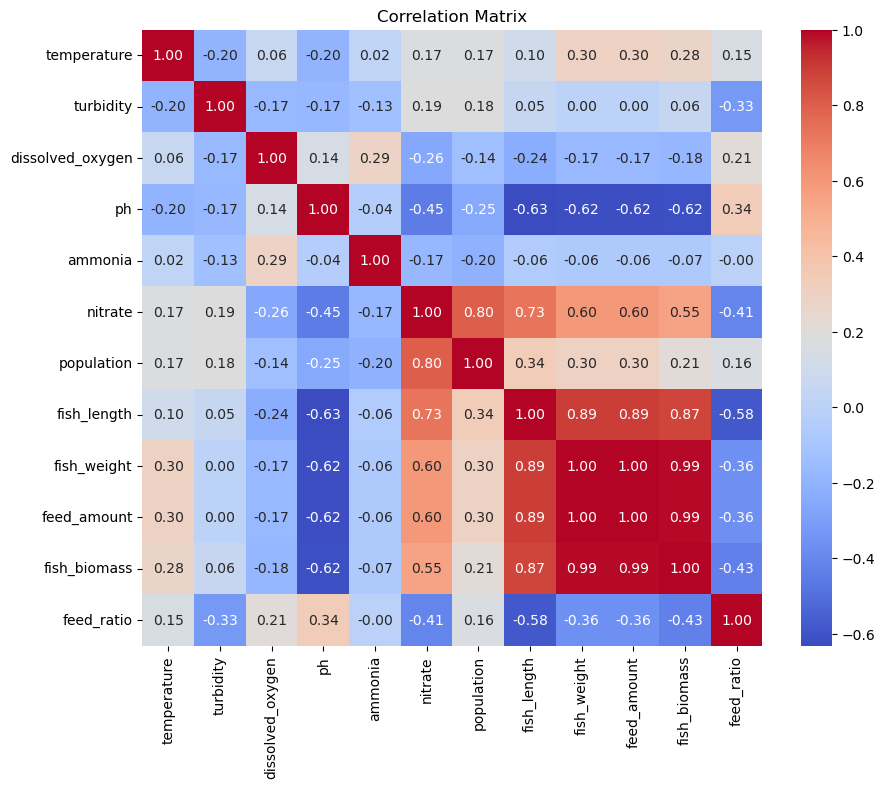

In [5]:
correlation_matrix =df.drop(columns={'pond','date'}).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [6]:
df.columns

Index(['date', 'temperature', 'turbidity', 'dissolved_oxygen', 'ph', 'ammonia',
       'nitrate', 'population', 'fish_length', 'fish_weight', 'pond',
       'feed_amount', 'fish_biomass', 'feed_ratio'],
      dtype='object')

## Fish Weight Use Case (Weight Prediction)

In [7]:
fish_weight_data = df[['temperature','dissolved_oxygen','ph','fish_weight']]

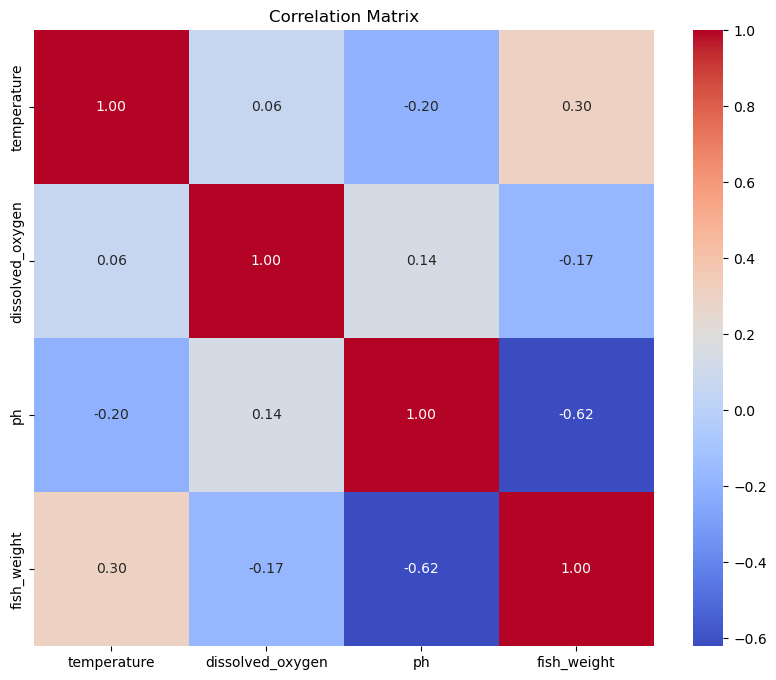

In [8]:
correlation_matrix = fish_weight_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [9]:
fish_weight_data.shape

(379588, 4)

In [10]:
unseen_fish_weight_data = fish_weight_data.tail(79588)

fish_weight_data = fish_weight_data.iloc[:-79588]

In [11]:
print(fish_weight_data.shape)
print(unseen_fish_weight_data.shape)

(300000, 4)
(79588, 4)


In [12]:
X = fish_weight_data.drop(columns=['fish_weight'])
y = fish_weight_data['fish_weight']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [14]:
print(X_train.shape)
print(X_test.shape)

(270000, 3)
(30000, 3)


### Linear Regression (Base Model)

In [15]:
lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

LinearRegression()

In [16]:
lr_predictions = lr_model.predict(X_test)

In [17]:
lr_mse = mean_squared_error(y_test, lr_predictions)
print(lr_model.score(X_test, y_test))
print("Mean Squared Error:", lr_mse)

0.43969878940053675
Mean Squared Error: 4393.557858986189


In [18]:
lr_predicted_data = {'Actual': y_test.values, 'Predicted': lr_predictions, 'Difference': y_test.values - lr_predictions}
df_results = pd.DataFrame(lr_predicted_data)

df_results

,Actual,Predicted,Difference
0,4.760000,58.976736,-54.216736
1,6.160000,43.107850,-36.947850
2,61.010000,65.459680,-4.449680
3,66.200000,69.380703,-3.180703
4,61.114286,77.714173,-16.599887
...,...,...,...
29995,71.600000,65.646022,5.953978
29996,59.640000,91.110336,-31.470336
29997,27.771429,62.400724,-34.629296
29998,210.920000,87.849140,123.070860


In [19]:
for i in range(len(lr_predictions)):
    print("Predicted:", lr_predictions[i], "Actual:", y_test.iloc[i])

Predicted: 58.97673605236167 Actual: 4.76
Predicted: 43.107850222517186 Actual: 6.16
Predicted: 65.45968004800895 Actual: 61.01
Predicted: 69.38070307190529 Actual: 66.2
Predicted: 77.714172929065 Actual: 61.11428571
Predicted: 106.73556033151854 Actual: 237.0
Predicted: 85.80814008806499 Actual: 25.24285714
Predicted: 82.2038984570298 Actual: 61.01
Predicted: 60.683993512239795 Actual: 65.32
Predicted: 81.4745531451614 Actual: 41.45714286
Predicted: 298.72257868275125 Actual: 256.4
Predicted: 171.95405129509066 Actual: 208.35
Predicted: 65.36296095847129 Actual: 110.98
Predicted: 85.50756049443754 Actual: 14.19
Predicted: 272.5706260697708 Actual: 701.0
Predicted: 52.017157676977035 Actual: 6.818571429
Predicted: 50.38657777268264 Actual: 9.857142857
Predicted: 76.82200048337882 Actual: 160.1
Predicted: 76.5407680105371 Actual: 68.4
Predicted: 148.12177411977143 Actual: 171.2
Predicted: 55.09861346464339 Actual: 3.081428
Predicted: 72.38560003371708 Actual: 182.92
Predicted: 88.394562

### Random Forest Model

In [20]:
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)

In [21]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [22]:
rf_predictions = rf_model.predict(X_test)

In [23]:
rf_mse = mean_squared_error(y_test, rf_predictions)
print(rf_model.score(X_test, y_test))
print("Random Forest Mean Squared Error:", rf_mse)

0.9166659069302961
Random Forest Mean Squared Error: 653.4577341643788


In [24]:
rf_predicted_data = {'Actual': y_test.values, 'Predicted': rf_predictions, 'Difference': y_test.values - rf_predictions}
df_results = pd.DataFrame(rf_predicted_data)

df_results

,Actual,Predicted,Difference
0,4.760000,4.564250,1.957500e-01
1,6.160000,6.317930,-1.579300e-01
2,61.010000,66.142164,-5.132164e+00
3,66.200000,57.759200,8.440800e+00
4,61.114286,61.114286,-9.094947e-12
...,...,...,...
29995,71.600000,86.425400,-1.482540e+01
29996,59.640000,65.730240,-6.090240e+00
29997,27.771429,28.421143,-6.497143e-01
29998,210.920000,187.864857,2.305514e+01


In [25]:
for i in range(len(rf_predictions)):
    print("Predicted:", rf_predictions[i], "Actual:", y_test.iloc[i])

Predicted: 4.5642499999999995 Actual: 4.76
Predicted: 6.317930000000001 Actual: 6.16
Predicted: 66.14216428600004 Actual: 61.01
Predicted: 57.75920000000001 Actual: 66.2
Predicted: 61.11428571000909 Actual: 61.11428571
Predicted: 237.35885714399998 Actual: 237.0
Predicted: 36.20399999759999 Actual: 25.24285714
Predicted: 67.39534428571433 Actual: 61.01
Predicted: 56.1013518903319 Actual: 65.32
Predicted: 41.457142860000005 Actual: 41.45714286
Predicted: 253.24999999999977 Actual: 256.4
Predicted: 208.6632000000002 Actual: 208.35
Predicted: 73.96638666666666 Actual: 110.98
Predicted: 13.012449999999996 Actual: 14.19
Predicted: 701.0 Actual: 701.0
Predicted: 6.81857142900001 Actual: 6.818571429
Predicted: 12.584828571380001 Actual: 9.857142857
Predicted: 67.65294285640002 Actual: 160.1
Predicted: 67.51320000000001 Actual: 68.4
Predicted: 171.19999999999993 Actual: 171.2
Predicted: 3.4085570857999987 Actual: 3.081428
Predicted: 117.96750285739998 Actual: 182.92
Predicted: 52.1711993236492

In [26]:
X_unseen = unseen_fish_weight_data.drop(columns=['fish_weight'])
y_unseen = unseen_fish_weight_data['fish_weight']

In [27]:
unseen_predictions = rf_model.predict(X_unseen)

unseen_fish_weight_data['predictions'] = unseen_predictions

unseen_fish_weight_data

,temperature,dissolved_oxygen,ph,fish_weight,predictions
300000,24.1250,0.828,7.47128,59.600000,43.907429
300001,24.3125,7.987,7.50306,48.714286,62.037314
300002,24.5625,37.511,7.31694,61.690000,50.814933
300003,26.2500,0.000,6.58154,164.742857,164.742857
300004,27.0000,3.200,3.11793,320.450000,328.061000
...,...,...,...,...,...
379583,24.3125,20.834,7.68463,9.857143,22.398171
379584,26.3125,11.909,8.40641,2.910000,3.174621
379585,23.2500,5.080,7.31694,49.300000,63.566722
379586,23.8750,11.149,6.73135,49.430000,49.630600


In [28]:
unseen_fish_weight_data[unseen_fish_weight_data['fish_weight'] != unseen_fish_weight_data['predictions']]

,temperature,dissolved_oxygen,ph,fish_weight,predictions
300000,24.1250,0.828,7.47128,59.600000,43.907429
300001,24.3125,7.987,7.50306,48.714286,62.037314
300002,24.5625,37.511,7.31694,61.690000,50.814933
300003,26.2500,0.000,6.58154,164.742857,164.742857
300004,27.0000,3.200,3.11793,320.450000,328.061000
...,...,...,...,...,...
379583,24.3125,20.834,7.68463,9.857143,22.398171
379584,26.3125,11.909,8.40641,2.910000,3.174621
379585,23.2500,5.080,7.31694,49.300000,63.566722
379586,23.8750,11.149,6.73135,49.430000,49.630600


In [29]:
unseen_fish_weight_data['difference'] = unseen_fish_weight_data['fish_weight'] - unseen_fish_weight_data['predictions']

In [30]:
print(unseen_fish_weight_data['difference'].max())
print(unseen_fish_weight_data['difference'].min())
print(unseen_fish_weight_data['difference'].median())

622.6857
-586.54284284
-3.552713678800501e-15


In [31]:
unseen_fish_weight_data[unseen_fish_weight_data['difference'] >= 1]

,temperature,dissolved_oxygen,ph,fish_weight,predictions,difference
300000,24.1250,0.828,7.47128,59.600000,43.907429,15.692571
300002,24.5625,37.511,7.31694,61.690000,50.814933,10.875067
300006,24.1875,14.859,7.72549,134.800000,91.082314,43.717686
300009,24.1250,7.945,7.08996,70.200000,67.850667,2.349333
300012,23.7500,19.112,7.17167,67.520000,63.287429,4.232571
...,...,...,...,...,...,...
379572,24.0625,19.203,7.37141,40.414286,38.796000,1.618286
379573,24.1250,29.912,7.46220,27.771429,24.484286,3.287143
379579,24.6875,28.382,7.90253,12.310000,10.912750,1.397250
379580,24.5000,38.635,7.31694,61.690000,52.938479,8.751521


In [32]:
unseen_fish_weight_data[unseen_fish_weight_data['difference'] <= -1]

,temperature,dissolved_oxygen,ph,fish_weight,predictions,difference
300001,24.3125,7.987,7.50306,48.714286,62.037314,-13.323029
300004,27.0000,3.200,3.11793,320.450000,328.061000,-7.611000
300013,24.3125,21.789,7.02641,143.542857,145.508000,-1.965143
300016,23.2500,5.080,7.16260,95.560000,118.641995,-23.081995
300017,23.9375,5.080,7.25338,57.010000,102.249953,-45.239953
...,...,...,...,...,...,...
379578,25.1250,0.464,7.50306,54.157143,136.889486,-82.732343
379581,24.7500,24.443,7.18529,95.057143,107.262857,-12.205714
379582,23.3750,5.080,7.28970,57.010000,77.263263,-20.253263
379583,24.3125,20.834,7.68463,9.857143,22.398171,-12.541029


In [ ]:
# """ Saving the model """

# with open('rf_fish_weight_model.pkl', 'wb') as file:
#     pickle.dump(rf_model, file)

In [ ]:
# """ Loading the saved model """

# with open('your_trained_model.pkl', 'rb') as file:
#     loaded_model = pickle.load(file)

In [ ]:
unseen_fish_weight_data.ph.max()

In [ ]:
unseen_fish_weight_data.ph.min()